# HR Analytics Project- Understanding the Attrition in HR

###### Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

##### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

##### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

##### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

### Import All Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load HR Analytics dataset
df=pd.read_csv('HR_Employee.csv')

In [3]:
#disply top 5 rows
pd.set_option('display.max_columns',50) # To display the all columns
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
#display the column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### About the columns:-

###### 1.Age

In this column mention the Employee Age.

###### 2.Attrition

In this column mention that Employee is Attrition or not (Yes or No) and It is the Target Variable.

###### 3.Business Travel

In this column contain that Employee Travel for Business is that frequent travel or rarely travel.

###### 4.DailyRate

In this column contain that Employee Daily Rate.

###### 5.Department

In this column contain that Employee working Department

###### 6.Distance From Home

In this column contain that Employee Distance from home to company

###### 7.Education

In this column contain that Employee Education

###### 8.Education Field

In this column contain that Employee Education Field

###### 9.Employee Count

In this column contain that Employee Count

###### 10.Employee Number

In this column contain that Employee Number 

###### 11.Environment Satisfaction

In this column contain that Employee that Environment Satisfaction in company

###### 12.Gender

In this column contain  that Employee Gender(Sex).

###### 13.Hourly Rate

In this column contain that Hourly Rating of Employee

###### 14.Job Involvement

In this column contain that how much that Employee involve in his/her job.

###### 15.Job level

In this column contain that Employee Job level

###### 16.Job Role

In this column contain that Employee Job Role in his company

###### 17.Job Satisfaction

In this column contain that Employee Job Satisfaction

###### 18.Marital Status

In this column contain that Employee marital Status (Married or Single)

###### 19.Monthly Income

In this column contain  that Company gine Monthly Income from that Employee

###### 20.Monthly Rate

In this column contain Employee Monthly Rating

###### 21.Num Companies Worked

In this column contain that Employee Experiance that Number of Companies he/her Worked

###### 22.Over 18

In this column contain that Employee is Over 18 or Not (yes or No)

###### 23.Over Time

In this column contain that Employee is did Over Time or Not(Yes or NO)

###### 24.Percent Salary Hike

In this column contain that Employee Percent of Salary Hike

###### 25.performace Rating

In this column contain that Employee Performance Rating

###### 26.RelationshipSatisfaction

In this column contain  that Employee Relationship Satisfaction

###### 27.Standard Hours

In this column contain that Employee Standard Hours his/her Working 

###### 28.Stock Option Level

In this column contain that Stock Option level

###### 29.Total Working Years

In this column contain that Employee Total Working Years

###### 30.TrainingTimesLastYear

In this column contain that Employee that taken Training Times Last Year

###### 31.Work Life Balance

In this column contain Employee Working Life Balance

###### 32.Years At Company

In this column contain that how Many years  is that Employee working in that company

###### 33.YearsInCurrentRole

In this column contain that Employee Number of Years In Current Role

###### 34.YearsSinceLastPromotion

In this column contain that Empolyee Years Since Last Promotion

###### 35.YearsWithCurrManager

In this column contain that Employee Years With Current Manager

### Exploratory Data Analysis(EDA)

In [5]:
#checking shape
df.shape

(1470, 35)

1470 rows and 35 columns

In [6]:
#checking Empty spaces in data
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, St

There is no Empty spaces in dataset

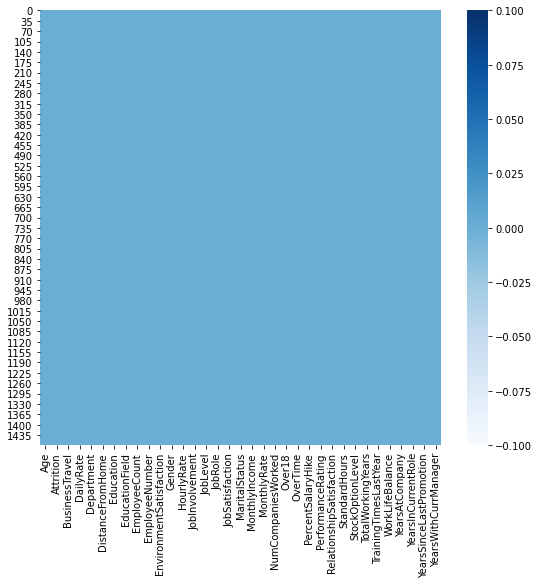

In [7]:
#checking Null values using heatmap
plt.figure(figsize=(9,8))
sns.heatmap(df.isnull(),cmap='Blues')
plt.show()

In [8]:
#checking null values and sum
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no null values in dataset

In [9]:
#checking datatype of all column
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

'Attrition', 'BusinessTravel','Department','EducationField','Gender','Job Role','MaritalStatus','Over18' and 'OverTime' this columns are Object datatype othet columns all are int64 .

In [10]:
#checking Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

###### Observations:-

1. 1470 entries are here
2. Data columns (total 35 columns)
3. There is no null values in dataset
4. There are 26 variables int64 dtype
5. There are 9 variables object dtype
6. Memory usage is 402.1+ KB

#### Analysis More About columns

In [11]:
#checking unique
print(df['Age'].unique())
#count the unique values
print(df['Age'].value_counts())

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='count'>

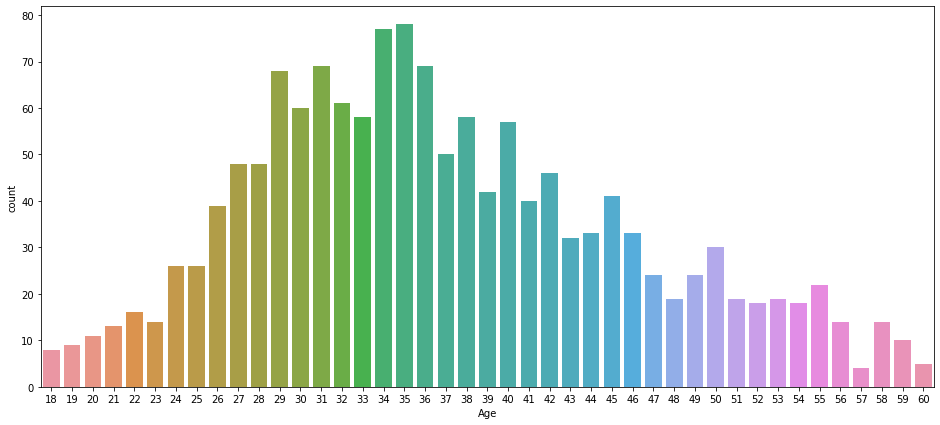

In [12]:
#count plot
plt.figure(figsize=(16,7))
sns.countplot(df['Age'])

Most of the Employees are 34 and 35 years old.

In [13]:
#checking unique
print(df['Attrition'].unique())
#count the unique values
print(df['Attrition'].value_counts())

['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

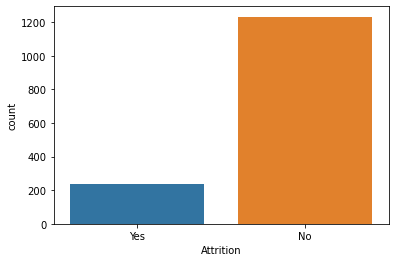

In [14]:
#count plot
sns.countplot(df['Attrition'])

Here No Attrition is High , It is the Target variable so , It is imbalanced dataset .

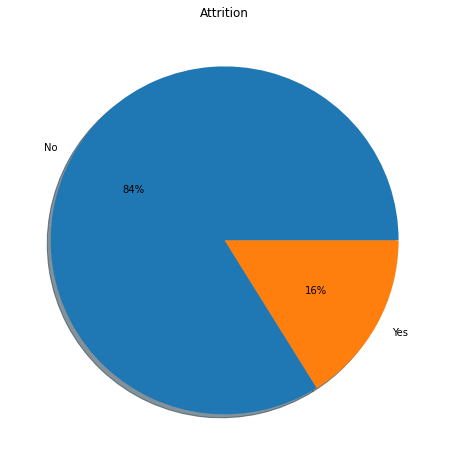

In [15]:
#pie chart
label=(['No','Yes'])
y=df['Attrition'].value_counts()

plt.figure(figsize=(9,8))
plt.title('Attrition')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

84% of Attrition is NO , This is imbalance Dataset

In [16]:
#checking unique
print(df['BusinessTravel'].unique())
#count the unique values
print(df['BusinessTravel'].value_counts())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

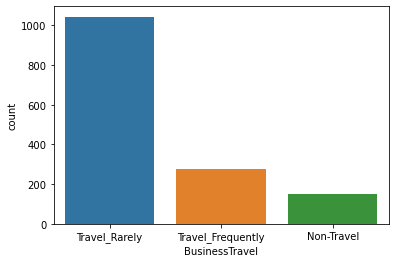

In [17]:
#count plot
sns.countplot(df['BusinessTravel'])

Many of Employees are Travel Rarely

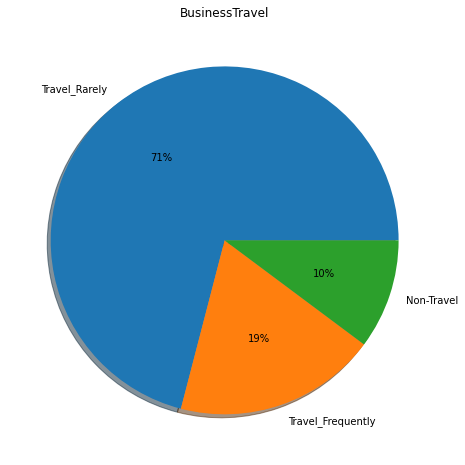

In [18]:
#pie chart
label=df['BusinessTravel'].unique()
y=df['BusinessTravel'].value_counts()

plt.figure(figsize=(9,8))
plt.title('BusinessTravel')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

71% of Employees are Travel Rarely,19% of Employees are Travel Frequently And Fianlly 10% of Employees are Non-Travel.

In [19]:
#checking unique
print(df['Department'].unique())
#count the unique values
print(df['Department'].value_counts())

['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<AxesSubplot:xlabel='Department', ylabel='count'>

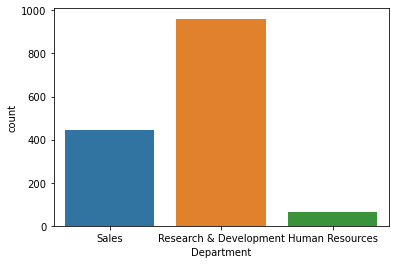

In [20]:
#count plot
sns.countplot(df['Department'])

Many of Employees in Research And Development Department

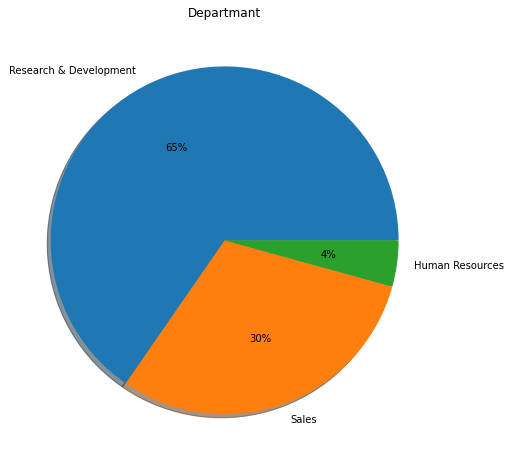

In [21]:
#pie chart
label=(['Research & Development','Sales','Human Resources'])
y=df['Department'].value_counts()

plt.figure(figsize=(9,8))
plt.title('Departmant')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

65% of Employee are working In Research & Development , 30% of Employees are working in Sales Department, only 4% of Employees are working in Human Resources. 

In [22]:
#checking unique
print(df['EducationField'].unique())
#count the unique values
print(df['EducationField'].value_counts())

['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


<AxesSubplot:xlabel='EducationField', ylabel='count'>

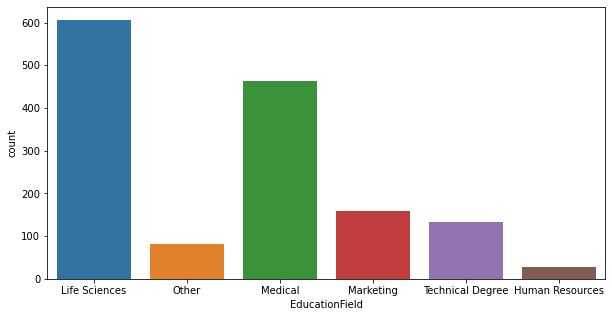

In [23]:
#count plot
plt.figure(figsize=(10,5))
sns.countplot(df['EducationField'])

My of Employees are Life Sciences Education Field

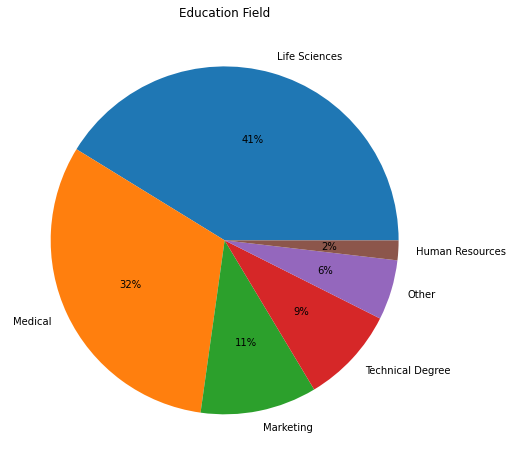

In [24]:
#pie chart
label=(['Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'])
y=df['EducationField'].value_counts()

plt.figure(figsize=(9,8))
plt.title('Education Field')
plt.pie(y,labels=label,autopct='%.0f%%')
plt.show()

41% of Employees Education Field is Life Sciences , 32% of Employees Education Field is Medical .

In [25]:
#checking unique
print(df['Gender'].unique())
#count the unique values
print(df['Gender'].value_counts())

['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

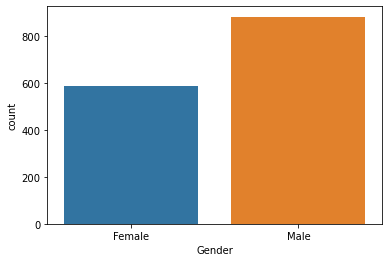

In [26]:
#count plot
sns.countplot(df['Gender'])

Males Employees are high .

In [27]:
#checking unique
print(df['JobRole'].unique())
#count the unique values
print(df['JobRole'].value_counts())

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


<AxesSubplot:xlabel='JobRole', ylabel='count'>

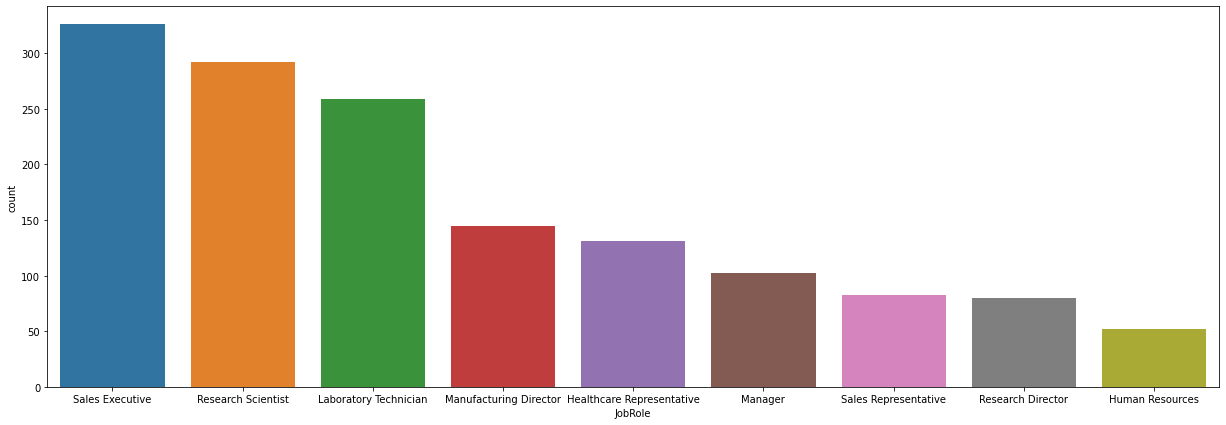

In [28]:
#count plot
plt.figure(figsize=(21,7))
sns.countplot(df['JobRole'])

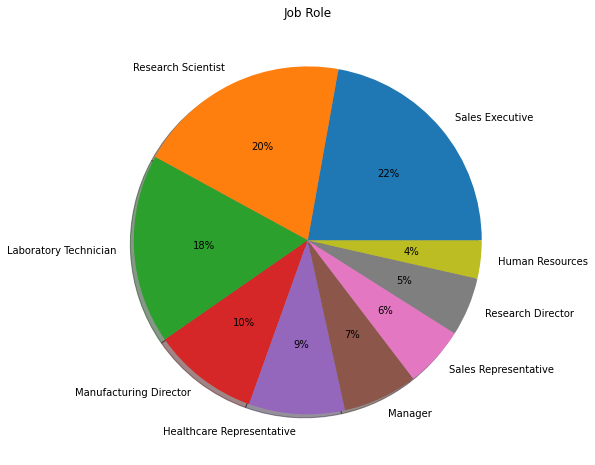

In [29]:
#pie chart
label=df['JobRole'].unique()
y=df['JobRole'].value_counts()

plt.figure(figsize=(9,8))
plt.title('Job Role')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

22% of Employees are Sales Executives Role And 20% of Employees are Research Scientist Role And 18% of Employees are Laboratory Technicians Role

In [30]:
#checking unique
print(df['MaritalStatus'].unique())
#count the unique values
print(df['MaritalStatus'].value_counts())

['Single' 'Married' 'Divorced']
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

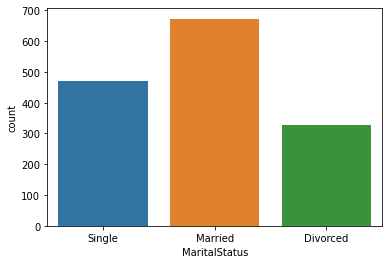

In [31]:
#count plot
sns.countplot(df['MaritalStatus'])

Many of Employees are Married here

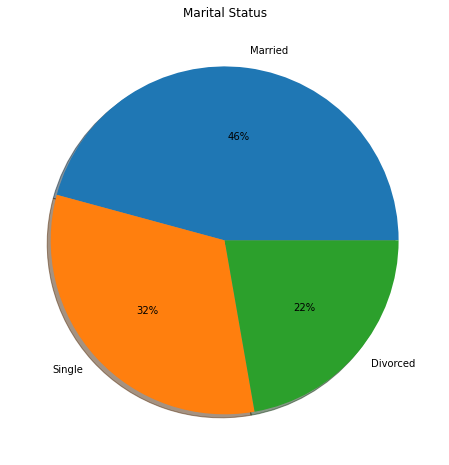

In [32]:
#pie chart
label=(['Married','Single','Divorced'])
y=df['MaritalStatus'].value_counts()

plt.figure(figsize=(9,8))
plt.title('Marital Status')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

In [33]:
#checking unique
print(df['OverTime'].unique())
#count the unique values
print(df['OverTime'].value_counts())

['Yes' 'No']
No     1054
Yes     416
Name: OverTime, dtype: int64


<AxesSubplot:xlabel='OverTime', ylabel='count'>

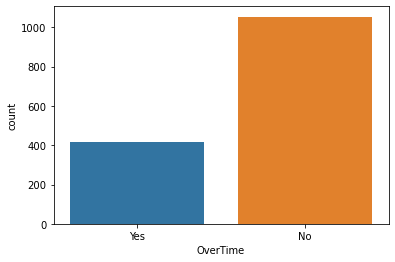

In [34]:
#count plot
sns.countplot(df['OverTime'])

Many of Employees say No for Over Time Job

##### Change Object into integer variable

In [35]:
list_object=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime','Attrition']

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label=LabelEncoder()

In [38]:
for x in list_object:
    df[x]=label.fit_transform(df[x])
    print(df[x].value_counts())
    print(label.inverse_transform(df[x]))

2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64
['Travel_Rarely' 'Travel_Frequently' 'Travel_Rarely' ... 'Travel_Rarely'
 'Travel_Frequently' 'Travel_Rarely']
1    961
2    446
0     63
Name: Department, dtype: int64
['Sales' 'Research & Development' 'Research & Development' ...
 'Research & Development' 'Sales' 'Research & Development']
1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64
['Life Sciences' 'Life Sciences' 'Other' ... 'Life Sciences' 'Medical'
 'Medical']
1    882
0    588
Name: Gender, dtype: int64
['Female' 'Male' 'Male' ... 'Male' 'Male' 'Male']
7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64
['Sales Executive' 'Research Scientist' 'Laboratory Technician' ...
 'Manufacturing Director' 'Sales Executive' 'Laboratory Technician']
1    673
2    470
0    327
Name: MaritalStatus, dtype: int64
['Single' 'Married' 'Single' ... 'Married' 'Married' 'Married']
0    

In [40]:
#target variable
label.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

Here,
1. 0-->No
2. 1-->Yes

In [41]:
#check that datatype of all columns after applying label Encoder
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

All variables are Integers

#### Drop Unwanted Variables

In [48]:
#checking unique
df['EmployeeCount'].unique()

array([1], dtype=int64)

If you observe above only 1 Employee Count , so drop that column

In [49]:
df.drop('EmployeeCount',axis=1,inplace=True)

In [50]:
#checking unique
df['Over18'].unique()

array([0])

If you observe only 1 over18 so, drop that column

In [51]:
df.drop('Over18',inplace=True,axis=1)

In [52]:
#checking unique
df['StandardHours'].unique()

array([80], dtype=int64)

if you observe above only 1 Standard Hours so, drop that column.

In [53]:
df.drop('StandardHours',inplace=True,axis=1)

In [54]:
#describe the dataset
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


###### Observations:-

1. There is no null values
2. There is outliers in Age,Daily Rate,Distance From Home,Employee Number,Mounthly Income,Monthly Rate and Years at company variables.
3. There is high skewness in Distance From Home,MonthlyIncome variable.

<AxesSubplot:>

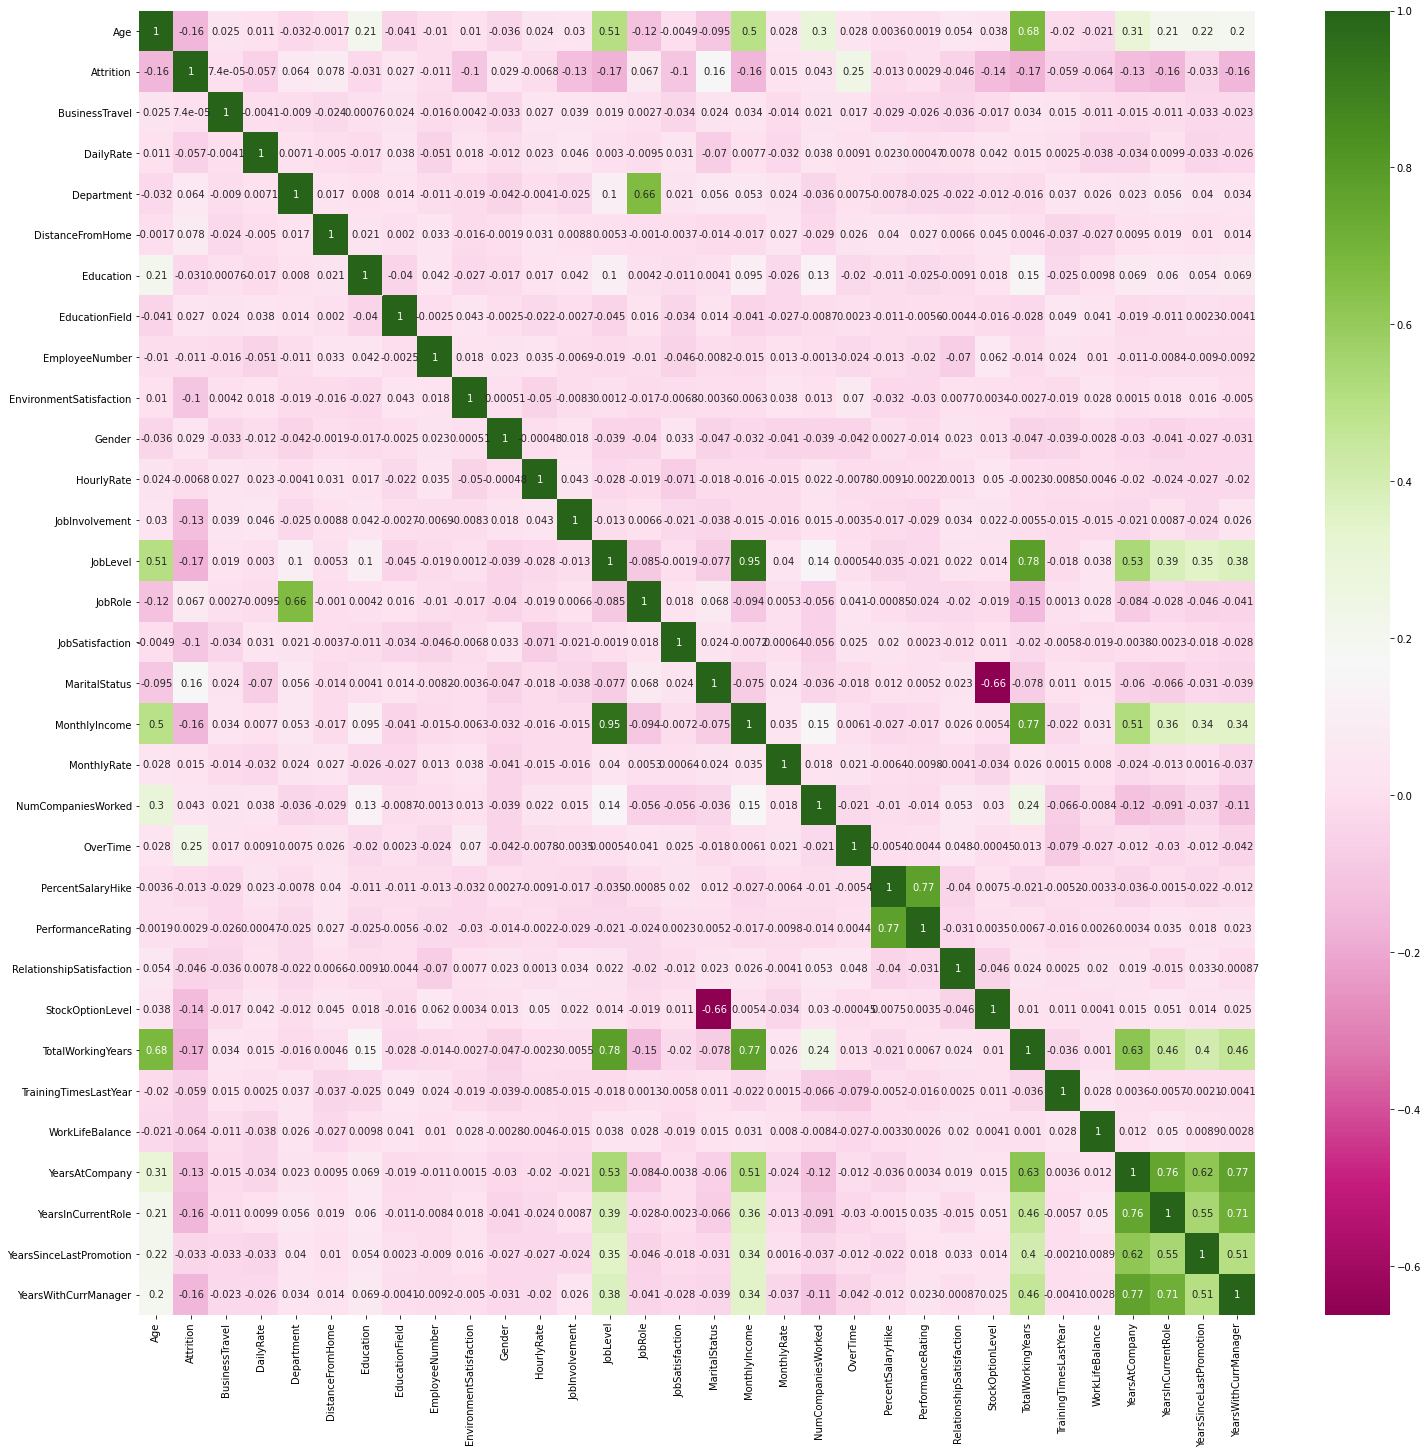

In [55]:
#checking correlation using heatmap
plt.figure(figsize=(25,24))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

If you observe above colors Green is Positive correlation And Pink is Negitive Correlation

In [56]:
#checking correlation
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,-0.024037,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


###### Observations:-

1. 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion' And 'YearsWithCurrManager' variables are good relation each other.
2. 'PercentSalaryHike', 'PerformanceRating' are positive relation each other .
3. MonthlyIncome is good relation with JobRole

In [61]:
#checking correlation of target variable
df_target=df.corr()
df_target['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

###### Observations:-

1. Over Time variable is high Positive Correlation with Attrition
2. MaritalStatus variable is positive correlation with Attrition
3. TotalWorkingYears variable High Negitive correlation with Attrition
4. YearsInCurrentRole  and JobLevel are Negitive correlation with Attrition

#### Scattor Plot

In [71]:
sns.set_theme()

<AxesSubplot:xlabel='JobLevel', ylabel='Age'>

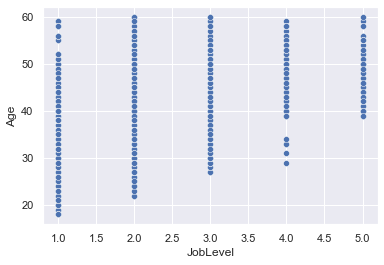

In [72]:
sns.scatterplot(df['JobLevel'],df['Age'])

If you observe Age increase means job level also increase And only Experienced Employees only get high level jobs

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

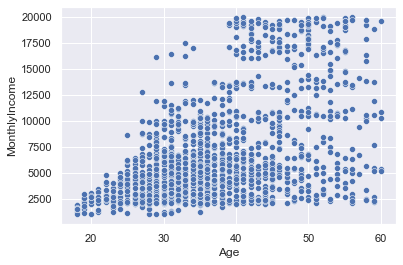

In [73]:
sns.scatterplot(df['Age'],df['MonthlyIncome'])

If you observe Age Increases means Monthly Income Also increase

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

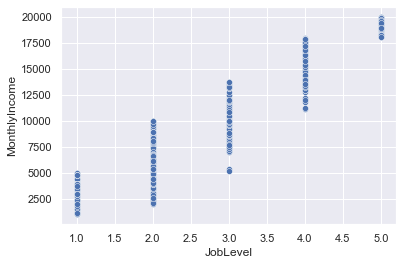

In [77]:
sns.scatterplot(df['JobLevel'],df['MonthlyIncome'])

If you observe job level increase means Monthly income also increase

<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

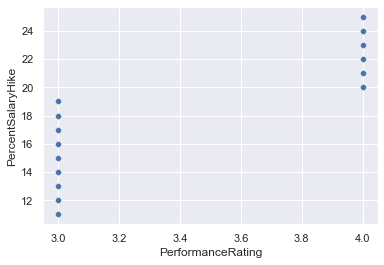

In [78]:
sns.scatterplot(df['PerformanceRating'],df['PercentSalaryHike'])

If Performance Rating Increase means Percent Salary Hike increase

#### Violin Plot

<AxesSubplot:xlabel='JobLevel', ylabel='Age'>

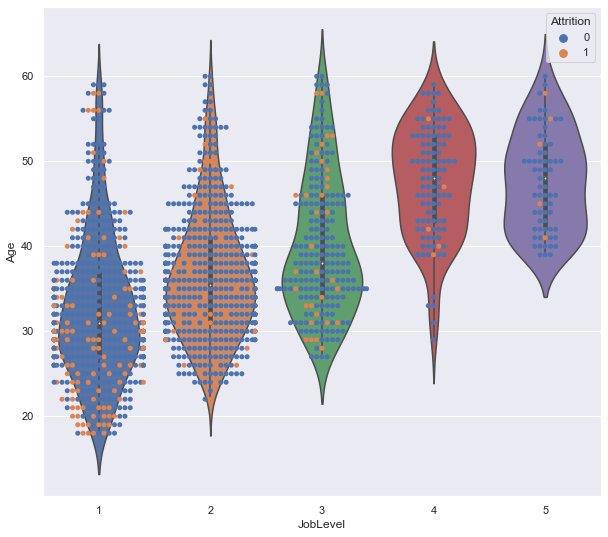

In [80]:
plt.figure(figsize=(10,9))
sns.swarmplot(x='JobLevel',y='Age',hue='Attrition',data=df)
sns.violinplot(x='JobLevel',y='Age',data=df)

Many of Employees Attrition in Job level 1

<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

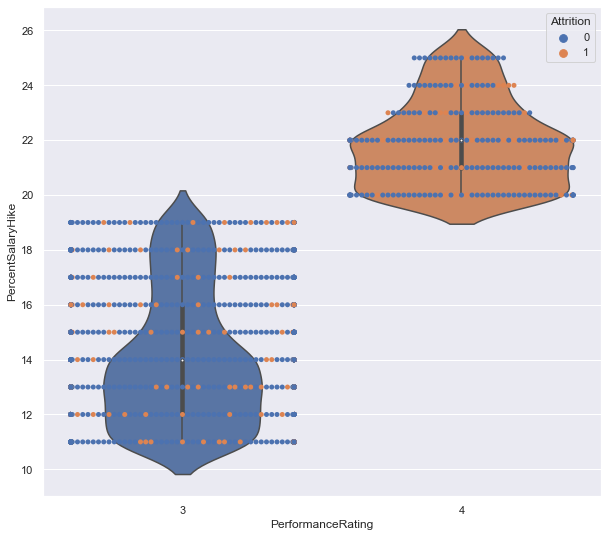

In [85]:
plt.figure(figsize=(10,9))
sns.swarmplot(x='PerformanceRating',y='PercentSalaryHike',hue='Attrition',data=df)
sns.violinplot(x='PerformanceRating',y='PercentSalaryHike',data=df)

Many of the Employees Attrition in low Performance Rating and low percent Salary Hike

<AxesSubplot:xlabel='OverTime', ylabel='Age'>

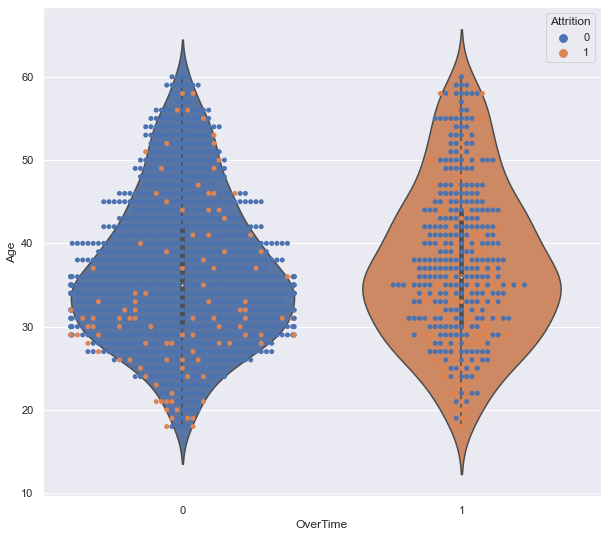

In [87]:
plt.figure(figsize=(10,9))
sns.swarmplot(x='OverTime',y='Age',hue='Attrition',data=df)
sns.violinplot(x='OverTime',y='Age',data=df)

### Pair Plot

In [ ]:
plt.figure(figsize=(20,19))
sns.pairplot(df)

#### Make Dataset Balanced

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
smt=SMOTE()

In [91]:
df_x=df.drop('Attrition',axis=1)

In [93]:
df_x.shape

(1470, 31)

In [98]:
df_y=df.iloc[:,1]

In [100]:
df_y.shape

(1470,)

In [101]:
train_x,train_y=smt.fit_resample(df_x,df_y)

In [103]:
#after Applying SMOTE
train_y.value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

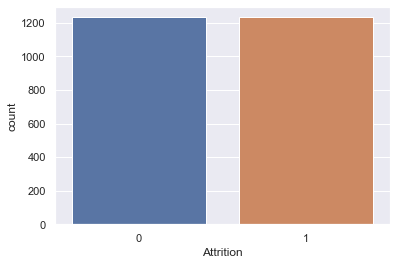

In [104]:
#count plot for Target variable
sns.countplot(train_y)

Now Dataset is Balanced .

In [105]:
#make dataframe
df=pd.DataFrame(train_x)

In [107]:
df['Attrition']=train_y

In [109]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0


In [110]:
#checking shape of dataset
df.shape

(2466, 32)

2466 Rows and 32 Columns

#### Checking outliers

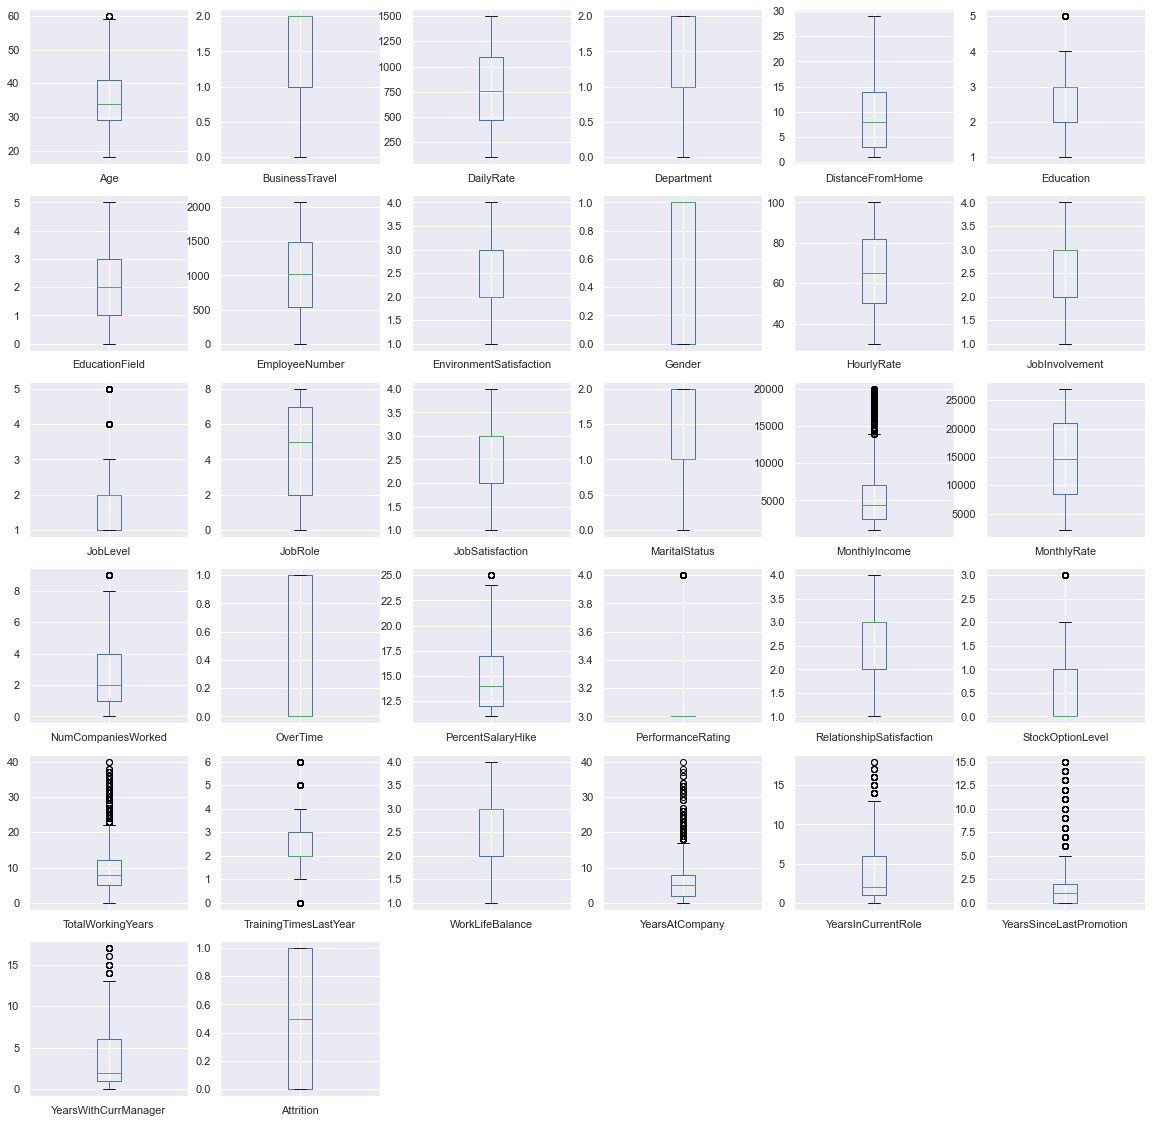

In [113]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,20))
plt.show()

#### Removing Outliers

In [114]:
from scipy.stats import zscore

In [115]:
z=np.abs(zscore(df))

In [116]:
threshold=3
print(np.where(z>3))

(array([   6,   18,   25,   25,   28,   29,   29,   45,   45,   45,   45,
         55,   62,   62,   62,   62,   63,   64,   64,   64,   65,   83,
         85,   88,   90,   92,   98,   98,  105,  105,  106,  110,  119,
        120,  122,  123,  123,  123,  123,  123,  126,  126,  126,  144,
        153,  165,  165,  178,  178,  178,  186,  186,  187,  187,  187,
        187,  187,  187,  190,  190,  190,  190,  190,  190,  193,  194,
        205,  218,  222,  231,  231,  231,  231,  231,  233,  233,  233,
        237,  237,  237,  237,  237,  240,  244,  244,  244,  251,  257,
        257,  270,  270,  270,  270,  279,  279,  280,  281,  281,  290,
        294,  304,  311,  314,  319,  321,  326,  326,  326,  329,  335,
        338,  386,  386,  390,  392,  392,  400,  400,  401,  401,  411,
        411,  411,  411,  411,  413,  417,  417,  424,  425,  425,  427,
        428,  436,  440,  445,  466,  466,  473,  473,  473,  477,  477,
        477,  497,  497,  508,  523,  526,  534,  

In [118]:
#checking one outlier row followed by column
z[6][23]

3.0560957073849

In [119]:
#Remove outliers and Create new Dataset
df_new=df[(z<3).all(axis=1)]

In [122]:
#Before Removing Outliers
df.shape

(2466, 32)

In [121]:
#After Removing Outliers
df_new.shape

(2200, 32)

2200 Rows And 32 Columns

In [123]:
df=df_new

#### Checking Skewness

In [124]:
#Independent variables
x=df.iloc[:,0:-1]

In [125]:
#Dependent variables
y=df.iloc[:,-1]

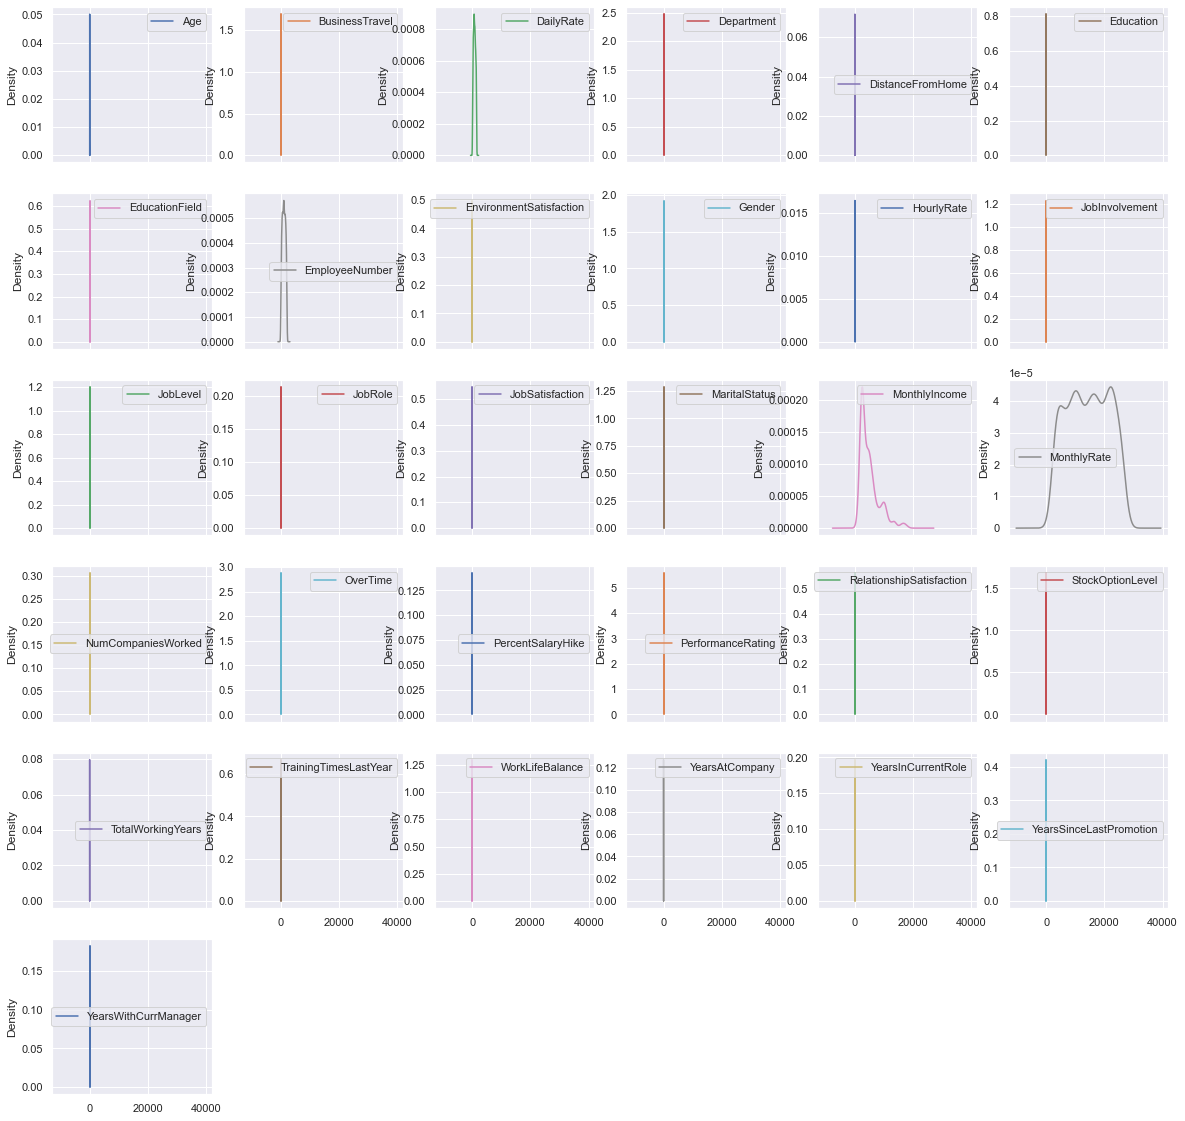

In [133]:
x.plot(kind='kde',subplots=True,layout=(6,6),figsize=(20,20))
plt.show()

In [130]:
x.skew()

Age                         0.581994
BusinessTravel             -0.959786
DailyRate                   0.091731
Department                  0.205880
DistanceFromHome            0.822943
Education                  -0.116970
EducationField              0.655703
EmployeeNumber              0.018867
EnvironmentSatisfaction     0.045251
Gender                     -0.071002
HourlyRate                  0.006068
JobInvolvement             -0.273135
JobLevel                    1.026824
JobRole                    -0.388987
JobSatisfaction            -0.008083
MaritalStatus              -0.151621
MonthlyIncome               1.528657
MonthlyRate                -0.017420
NumCompaniesWorked          0.979716
OverTime                    0.902052
PercentSalaryHike           0.840702
PerformanceRating           2.668486
RelationshipSatisfaction   -0.038931
StockOptionLevel            0.985553
TotalWorkingYears           1.118068
TrainingTimesLastYear       0.589524
WorkLifeBalance            -0.404626
Y

#### Removing Skewness

In [134]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [135]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer(method='box-cox')
pipeline=Pipeline(steps=[('s',scaler),('p',power)])

In [136]:
data=pipeline.fit_transform(x)

In [138]:
#make dataframe
x=pd.DataFrame(data,columns=x.columns)

In [140]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.841133,0.817398,0.880592,1.518480,-1.456790,-0.751903,-0.953443,-1.882523,-0.358951,-1.036106,1.482361,0.650569,0.770618,1.069971,1.426113,1.280845,0.705296,0.709741,1.743000,1.547599,-1.519598,-0.333333,-1.428312,-0.814219,0.112230,-2.537029,-1.901219,0.522566,0.576569,-0.937082,0.891529
1,1.571133,-1.030581,-1.374738,-0.345758,0.033366,-1.753990,-0.953443,-1.880539,0.562187,0.965152,-0.222029,-0.729450,0.770618,0.564484,-0.400897,-0.166921,0.425334,1.446809,-0.704497,-0.646162,1.792610,3.000000,1.422182,1.095496,0.471660,0.423664,0.528222,1.294468,1.322704,0.190496,1.328129
2,0.417796,0.817398,1.539026,-0.345758,-1.185112,-0.751903,1.391453,-1.876571,1.411461,0.965152,1.381970,-0.729450,-0.926489,-1.102201,0.535848,1.280845,-1.204221,-1.749417,1.384464,1.547599,0.245063,-0.333333,-0.441657,-0.814219,-0.087720,0.423664,0.528222,-1.745153,-1.361375,-0.937082,-1.301584
3,-0.053941,-1.030581,1.583970,-0.345758,-0.936994,1.372757,-0.953443,-1.874588,1.411461,-1.036106,-0.490395,0.650569,-0.926489,0.564484,0.535848,-0.166921,-0.632855,1.211321,-0.704497,1.547599,-1.519598,-0.333333,0.505448,-0.814219,0.112230,0.423664,0.528222,0.954107,1.322704,1.205349,-1.301584
4,-0.873938,0.817398,-0.465692,-0.345758,-1.185112,-1.753990,0.833782,-1.870621,-1.379017,0.965152,-1.371329,0.650569,-0.926489,-1.102201,-0.400897,-0.166921,-0.308375,0.315864,1.877783,-0.646162,-0.958775,-0.333333,1.422182,1.095496,-0.303038,0.423664,0.528222,-0.764240,-0.195553,0.827625,-0.145519


In [145]:
#after removing skewness
x.skew()

Age                         0.011625
BusinessTravel             -0.489194
DailyRate                  -0.033156
Department                  0.018683
DistanceFromHome            0.128520
Education                  -0.041026
EducationField              0.076896
EmployeeNumber             -0.049195
EnvironmentSatisfaction    -0.064131
Gender                     -0.071002
HourlyRate                 -0.050676
JobInvolvement             -0.037446
JobLevel                    0.288740
JobRole                    -0.190458
JobSatisfaction            -0.078177
MaritalStatus              -0.097804
MonthlyIncome               0.233707
MonthlyRate                -0.062923
NumCompaniesWorked          0.149469
OverTime                    0.902052
PercentSalaryHike           0.109960
PerformanceRating           2.668486
RelationshipSatisfaction   -0.084917
StockOptionLevel            0.452242
TotalWorkingYears           0.037684
TrainingTimesLastYear      -0.001634
WorkLifeBalance            -0.044355
Y

### VIF(Variance Inflation Factor)

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [144]:
vif()

,Variables,VIF Factor
0,Age,2.030079
1,BusinessTravel,1.050110
2,DailyRate,1.047588
3,Department,2.413613
4,DistanceFromHome,1.065260
5,Education,1.097975
6,EducationField,1.047507
7,EmployeeNumber,1.063220
8,EnvironmentSatisfaction,1.120264
9,Gender,1.064594


In [148]:
# BusinessTravel variable and DailyRate as same VIF Factor so,drop DailyRate variable
x.drop('DailyRate',inplace=True,axis=1)

In [149]:
# DistanceFromHome and Education variables as Same VIF Factor so , drop Education variable
x.drop('Education',axis=1,inplace=True)

In [150]:
# EnvironmentSatisfaction and JobInvolvement as Same VIF Factor so, drop JobInvolvement variable
x.drop('JobInvolvement',axis=1,inplace=True)

In [151]:
# PercentSalaryHike and PerformanceRating variables as same VIF Factor so, drop PerformanceRating variable
x.drop('PerformanceRating',axis=1,inplace=True)

In [152]:
#Gender And HourlyRate variable has Same VIF Factor So, drop HourlyRate variable
x.drop('HourlyRate',axis=1,inplace=True)

In [153]:
#After removing columns
x.shape

(2200, 26)

2200 Rows And 26 columns are independent variables

#### Standard Scaler

In [154]:
from sklearn.preprocessing import MinMaxScaler

In [155]:
scale=MinMaxScaler()

In [156]:
x=scale.fit_transform(x)

In [159]:
#after applying MinMaxscaler
x.shape

(2200, 26)

### Model Selection

In [160]:
#independent variables
x.shape

(2200, 26)

In [161]:
#dependent variable
y.shape

(2200,)

In [162]:
#classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

In [181]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [193]:
list_model=[lg,gnb,dtc,knc,svc,rfc,abc,gbc]

In [214]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
    plt.xlabel("predicted")
    plt.show()

In [215]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8469696969696969 Random state:- 74


accuracy_score:- 0.8469696969696969
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       303
           1       0.86      0.86      0.86       357

    accuracy                           0.85       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.85      0.85      0.85       660



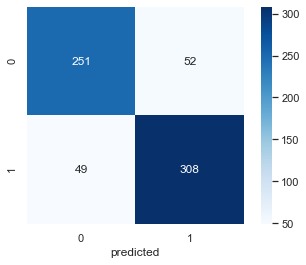

In [216]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

In [217]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gnb.fit(x_train,y_train)
    pred=gnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.7863636363636364 Random state:- 46


accuracy_score:- 0.7863636363636364
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       320
           1       0.78      0.82      0.80       340

    accuracy                           0.79       660
   macro avg       0.79      0.79      0.79       660
weighted avg       0.79      0.79      0.79       660



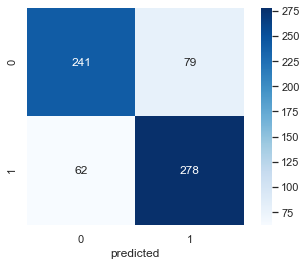

In [218]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=46)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
confusion_plot()

In [219]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8287878787878787 Random state:- 21


accuracy_score:- 0.8409090909090909
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       299
           1       0.85      0.86      0.86       361

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



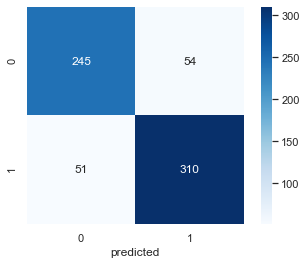

In [220]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=21)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

In [221]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8712121212121212 Random state:- 74


accuracy_score:- 0.8712121212121212
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       241
           1       0.96      0.83      0.89       419

    accuracy                           0.87       660
   macro avg       0.86      0.89      0.87       660
weighted avg       0.89      0.87      0.87       660



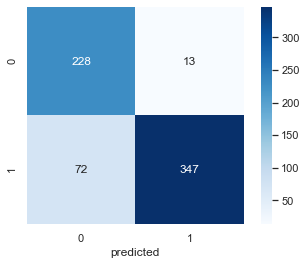

In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()

In [172]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9030303030303031 Random state:- 9


accuracy_score:- 0.9030303030303031
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       300
           1       0.93      0.89      0.91       360

    accuracy                           0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660



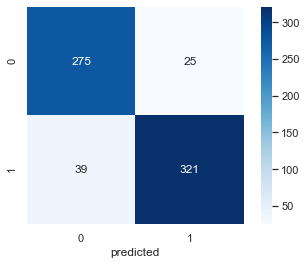

In [223]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=9)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()

In [174]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9257575757575758 Random state:- 74


accuracy_score:- 0.9181818181818182
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       304
           1       0.92      0.93      0.92       356

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660



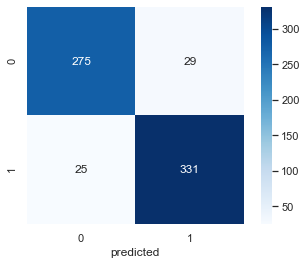

In [230]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=74)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

In [176]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8863636363636364 Random state:- 40


accuracy_score:- 0.8863636363636364
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       290
           1       0.91      0.88      0.90       370

    accuracy                           0.89       660
   macro avg       0.88      0.89      0.89       660
weighted avg       0.89      0.89      0.89       660



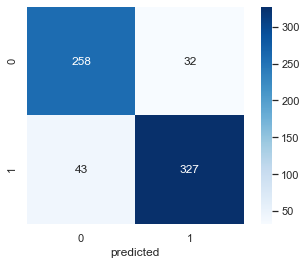

In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=40)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

In [182]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9045454545454545 Random state:- 39


accuracy_score:- 0.9045454545454545
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       285
           1       0.93      0.90      0.91       375

    accuracy                           0.90       660
   macro avg       0.90      0.91      0.90       660
weighted avg       0.91      0.90      0.90       660



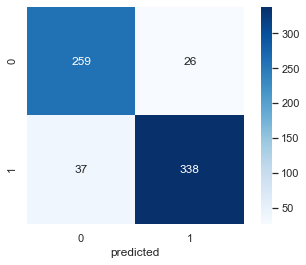

In [228]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=39)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()

#### Cross Validation

In [194]:
for model in list_model:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())

LogisticRegression()
[0.625      0.85       0.83181818 0.78409091 0.82272727]
0.7827272727272727
GaussianNB()
[0.65681818 0.77272727 0.72727273 0.72727273 0.74772727]
0.7263636363636364
DecisionTreeClassifier()
[0.54318182 0.78181818 0.75       0.72045455 0.52272727]
0.6636363636363637
KNeighborsClassifier()
[0.80909091 0.85454545 0.82272727 0.82727273 0.81818182]
0.8263636363636364
SVC()
[0.71136364 0.89318182 0.89772727 0.89090909 0.87727273]
0.8540909090909089
RandomForestClassifier()
[0.71363636 0.92727273 0.90454545 0.86363636 0.60454545]
0.8027272727272727
AdaBoostClassifier()
[0.325      0.68863636 0.67045455 0.74772727 0.50681818]
0.5877272727272727
GradientBoostingClassifier()
[0.48181818 0.71590909 0.69318182 0.62727273 0.54318182]
0.6122727272727273


### Hyperparameters for a model

In [239]:
random_forest_params={'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

In [243]:
rfc_grid = GridSearchCV(rfc, random_forest_params, cv=5)
rfc_grid.fit(x_train,y_train)
print('Best score:', rfc_grid.best_score_)
print('Best score:', rfc_grid.best_params_)
print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8941558441558441
Best score: {'criterion': 'gini', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(max_features='sqrt')


In [245]:
grid_pred=rfc_grid.predict(x_test)

In [257]:
def confusion_plot1():
    print('accuracy_score:-',accuracy_score(grid_pred,y_test))
    print(rfc_grid.best_estimator_)
    print(rfc_grid.best_params_)
    print('\nClassification Report')
    print(classification_report(grid_pred,y_test))
    matrix = confusion_matrix(grid_pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
    plt.xlabel("predicted")
    plt.show()

accuracy_score:- 0.9166666666666666
RandomForestClassifier(max_features='sqrt')
{'criterion': 'gini', 'max_features': 'sqrt'}

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       303
           1       0.92      0.93      0.92       357

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660



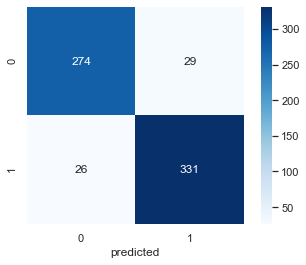

In [258]:
confusion_plot1()

### ROC Curve

In [275]:
rfc_pred=rfc_grid.best_estimator_.predict_proba(x_test)

In [276]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class=2

In [277]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, rfc_pred[:,i], pos_label=i)

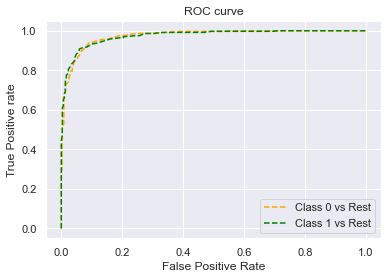

In [280]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC Curve',dpi=300); 

### Save the Model

In [281]:
import joblib

In [282]:
#save the model
joblib.dump(rfc_grid.best_estimator_,'HR_Analytics_Project.obj')

['HR_Analytics_Project.obj']

In [283]:
#load the model
rfc_load=joblib.load('HR_Analytics_Project.obj')

In [284]:
#check that model is working or not
rfc_load.predict(x_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,